# **Representing Knowledge and Generating Insights**

# Imports

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **About the dataset**
The Titanic dataset encompasses records of 891 passengers aboard the RMS Titanic, featuring details such as age, gender, ticket class, and survival status. Each entry includes information on whether the passenger survived the tragic sinking (coded as 1 for survived, 0 for not survived), along with socio-demographic factors like age, gender, and ticket class, which provide insights into survival patterns among different groups. Supplementary variables include familial relationships (SibSp for siblings/spouses and Parch for parents/children aboard), as well as details on embarkation port and fare paid. This dataset serves as a pivotal resource for analyzing factors influencing survival during maritime disasters and for constructing predictive models to understand survival probabilities based on passenger attributes.

In [16]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)
df=pd.read_csv('/content/drive/MyDrive/titanic.csv')
df.head()

Mounted at /content/drive


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [17]:
df.shape

(891, 12)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [19]:
print(df.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


# **Handling Missing Values**

In [20]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [21]:
# Fill missing values
df['Age'][df['Age'].isnull()] = round(np.mean(df['Age']), 0)  # Fill missing Age with mean
df['Fare'][df['Fare'].isnull()] = np.mean(df['Fare'])  # Fill missing Fare with mean
df['SibSp'][df['SibSp'].isnull()] = 0  # Assuming missing siblings/spouses means 0
df['Parch'][df['Parch'].isnull()] = 0  # Assuming missing parents/children means 0
df['Sex'] = df['Sex'].fillna('unknown')  # Fill missing Sex with 'unknown'
df['Cabin'] = df['Cabin'].fillna('unknown')  # Fill missing Cabin with 'unknown'
df['Embarked'] = df['Embarked'].fillna('unknown')  # Fill missing Embarked with 'unknown'

# Check for remaining missing values
missing_values = df.isnull().sum()
print(missing_values)


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


<ipython-input-21-df8a27f02da9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age'][df['Age'].isnull()] = round(np.mean(df['Age']), 0)  # Fill missing Age with mean
<ipython-input-21-df8a27f02da9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Fare'][df['Fare'].isnull()] = np.mean(df['Fare'])  # Fill missing Fare with mean
<ipython-input-21-df8a27f02da9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SibSp'][df['SibS

In [22]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.758889,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002570,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,30.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# **Categorizing Features**

**Continuous Features (contFeat):** Includes numerical variables with continuous values.

**Discrete Features (discreteFeat):** Includes categorical or ordinal variables with distinct categories or counts.

**Categorical Features (catFeat):** Includes variables that represent categories or labels without a natural numerical order.

This categorization helps in understanding the different types of data present in the Titanic dataset, which is crucial for performing appropriate data preprocessing, analysis, and modeling tasks.

In [23]:
# Continuous Features
contFeat = ['Age', 'Fare']

# Discrete Features
discreteFeat = ['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']

# Categorical Features (Remaining)
catFeat = ['Name', 'Ticket', 'Cabin']


# **Visualization of Discrete Variables**

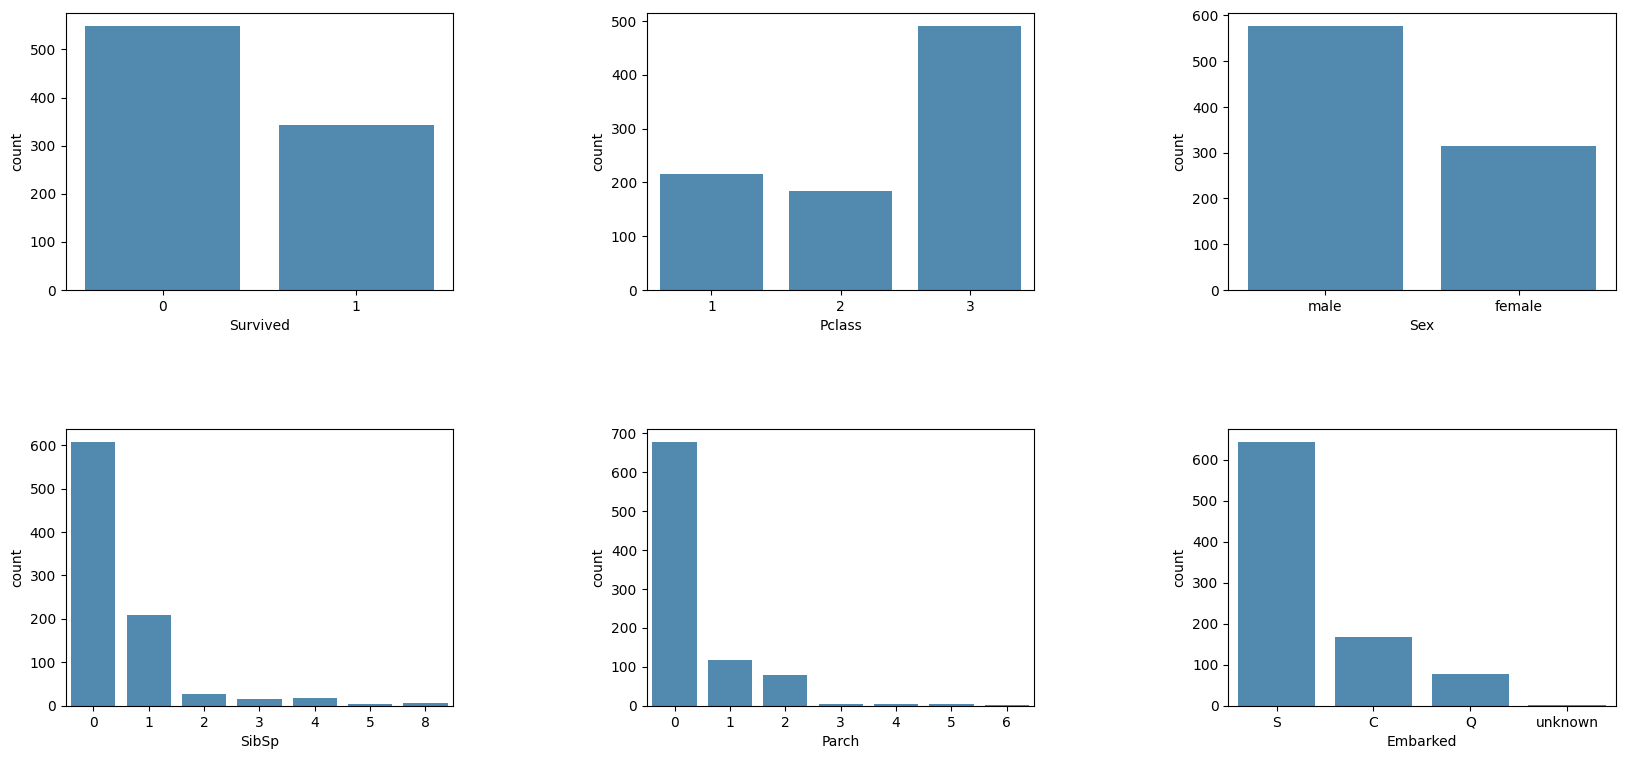

In [24]:
plt.figure(1 , figsize = (20 , 9))

n = 0
for f in discreteFeat:
    n += 1
    plt.subplot(2 , 3 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.countplot(x = f , data = df , alpha = 0.85)

plt.show()

Survived:
Visualizing the 'Survived' variable helps you understand the distribution of survivors versus non-survivors. This can provide insights into the overall survival rate of passengers on the Titanic.

Pclass (Passenger Class):
Analyzing 'Pclass' can reveal socio-economic status differences among passengers. Also shows the distribution of passengers across different classes (1st, 2nd, 3rd) and potentially uncover survival rate disparities among different classes. This indicates if there was a priority given to passengers in higher classes during rescue efforts.

Sex:
Plotting 'Sex' illustrates the gender distribution aboard the Titanic. It's well-known that there was a significant difference in survival rates between males and females during the disaster. Visualizing this variable confirms this disparity and provide insights into gender-related rescue policies or cultural norms of the time.

SibSp (Siblings/Spouses Aboard):
Visualizing 'SibSp' helps understand the distribution of passengers based on the number of siblings or spouses they had aboard. This can provide insights into family sizes among passengers.

Parch (Parents/Children Aboard):
Similar to 'SibSp', plotting 'Parch' shows the distribution based on the number of parents or children aboard. This can reveal family structures among passengers.

Embarked (Port of Embarkation):
Analyzing 'Embarked' can show the distribution of passengers based on where they embarked (Southampton, Cherbourg, Queenstown). Visualization can uncover any demographic differences among passengers from different ports .

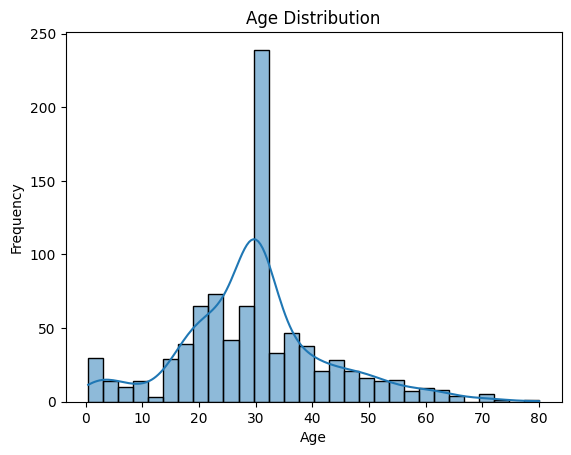

In [25]:
# Histogram for age distribution
sns.histplot(df['Age'].dropna(), bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()



# **Vizualisation of continuous Variables**

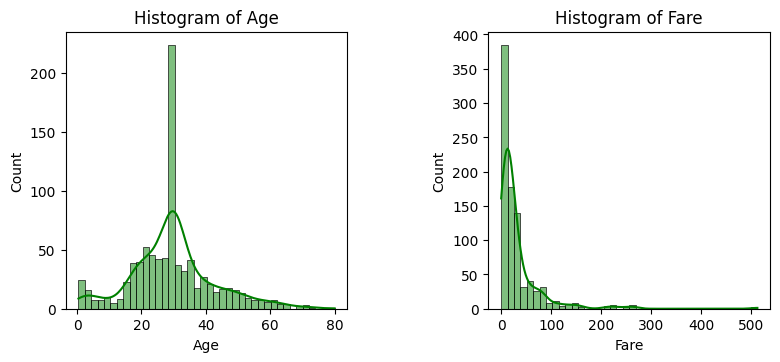

In [26]:
plt.figure(1, figsize=(20, 9))

n = 0
for f in contFeat:
    n += 1
    plt.subplot(2, 4, n)
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    sns.histplot(df[f], bins=40, color='green', kde=True)
    plt.title('Histogram of {}'.format(f))

plt.show()

Histogram of 'Age' reveals whether passengers were predominantly young or old, whereas  histogram of 'Fare' indicates the range of ticket prices paid by passengers.
These distributions helps in identifying outliers, understanding data ranges, and potentially spotting patterns.

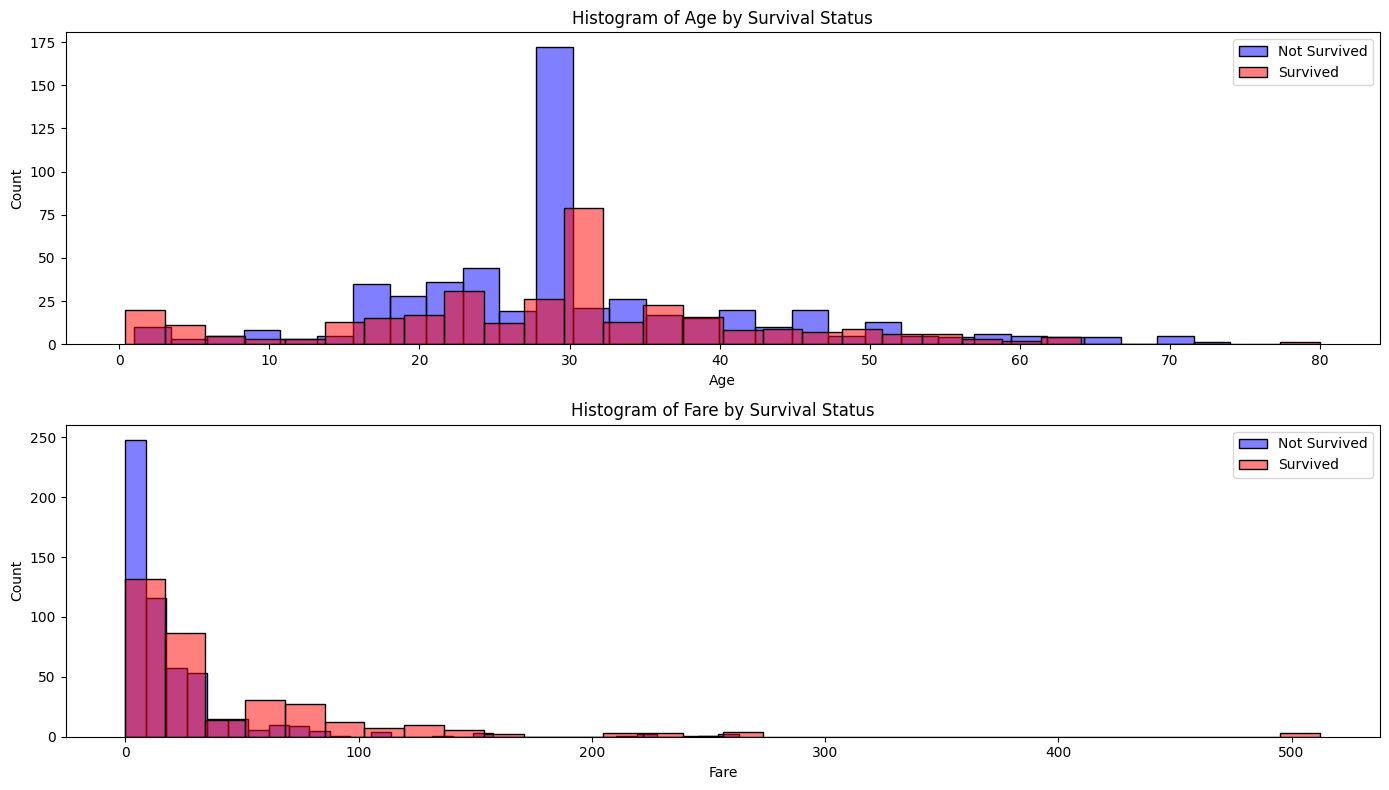

In [27]:
# Plotting histograms for each continuous feature based on 'Survived'
plt.figure(figsize=(14, 8))

for i, f in enumerate(contFeat, start=1):
    plt.subplot(len(contFeat), 1, i)
    sns.histplot(df[f][df['Survived'] == 0], bins=30, label='Not Survived', color='blue', alpha=0.5)
    sns.histplot(df[f][df['Survived'] == 1], bins=30, label='Survived', color='red', alpha=0.5)
    plt.xlabel(f)
    plt.ylabel('Count')
    plt.legend()
    plt.title(f'Histogram of {f} by Survival Status')

plt.tight_layout()
plt.show()

# **Scatter Plot vizualization**
We will be using the scatter plot to visually explore the relationship between two continuous variables within our dataset. By incorporating a 'hue' parameter, we can differentiate between two groups based on a discrete variable, allowing us to observe patterns and potential interactions between the variables. The scatter plot will help in identifying trends, clusters, and potential outliers, providing valuable insights into the underlying data structure and aiding in the development of predictive models.

In [28]:
def scatter_plot(x, y, hue, label1, label2, s1=50, s2=100):
    plt.scatter(x=x, y=y, s=s1, data=df[df[hue] == 0],
                label=label1, alpha=0.8)
    plt.scatter(x=x, y=y, s=s2, data=df[df[hue] == 1],
                label=label2, color='red', alpha=0.5)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.legend()

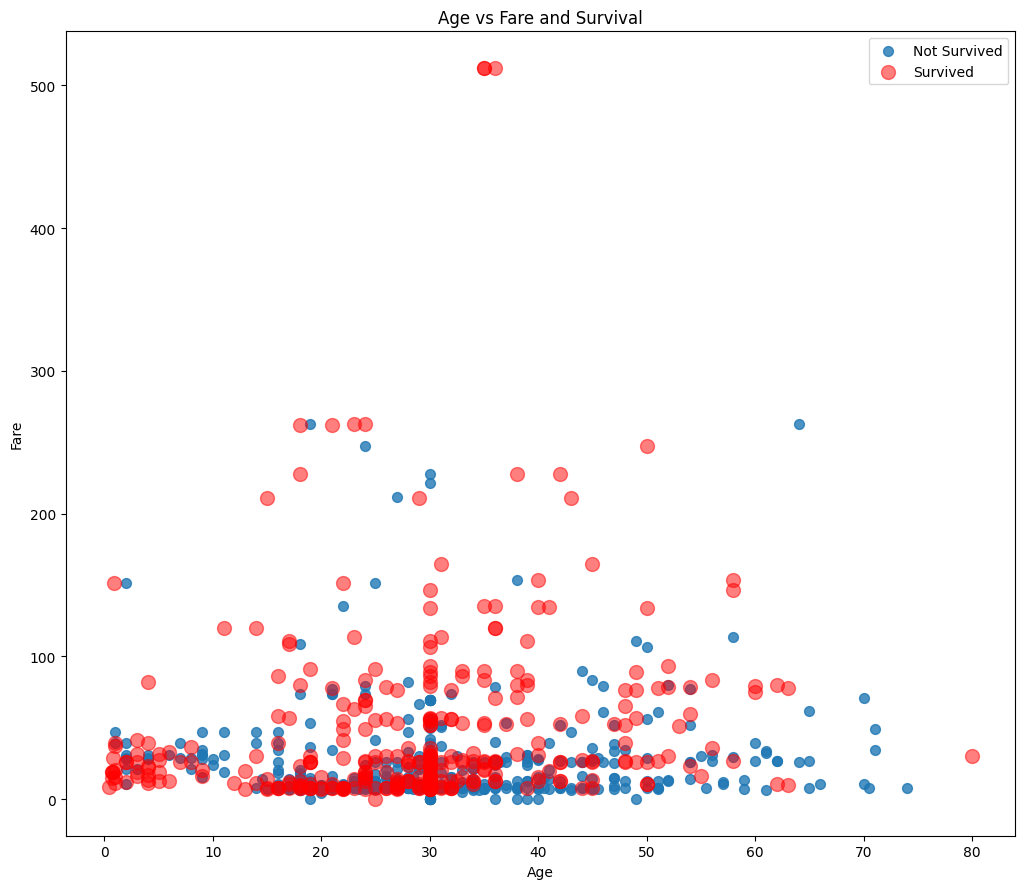

In [29]:
plt.figure(figsize=(20, 9))

plt.subplot(1, 2, 1)
scatter_plot(x='Age', y='Fare', hue='Survived', label1='Not Survived', label2='Survived')

plt.title('Age vs Fare and Survival')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.tight_layout()
plt.show()


This plot visualizes the relationship between age, fare paid, and survival status among passengers in a titanic dataset. The scatterplot is divided into two sections. The x-axis represents the passengers' age, the y-axis represents the fare they paid, and the color of each point indicates whether the passenger survived (blue) or did not survive (orange). The size of each point also corresponds to survival status, with larger points indicating survival. By examining this plot, we aim to explore potential patterns or correlations: for instance, whether there are clusters of survivors based on age and fare, or if there's any noticeable trend in fare paid among survivors versus non-survivors across different age groups. This visualization helps in understanding how age and fare might have influenced survival outcomes among passengers during the event being studied, offering insights into potential factors contributing to survival in the datase

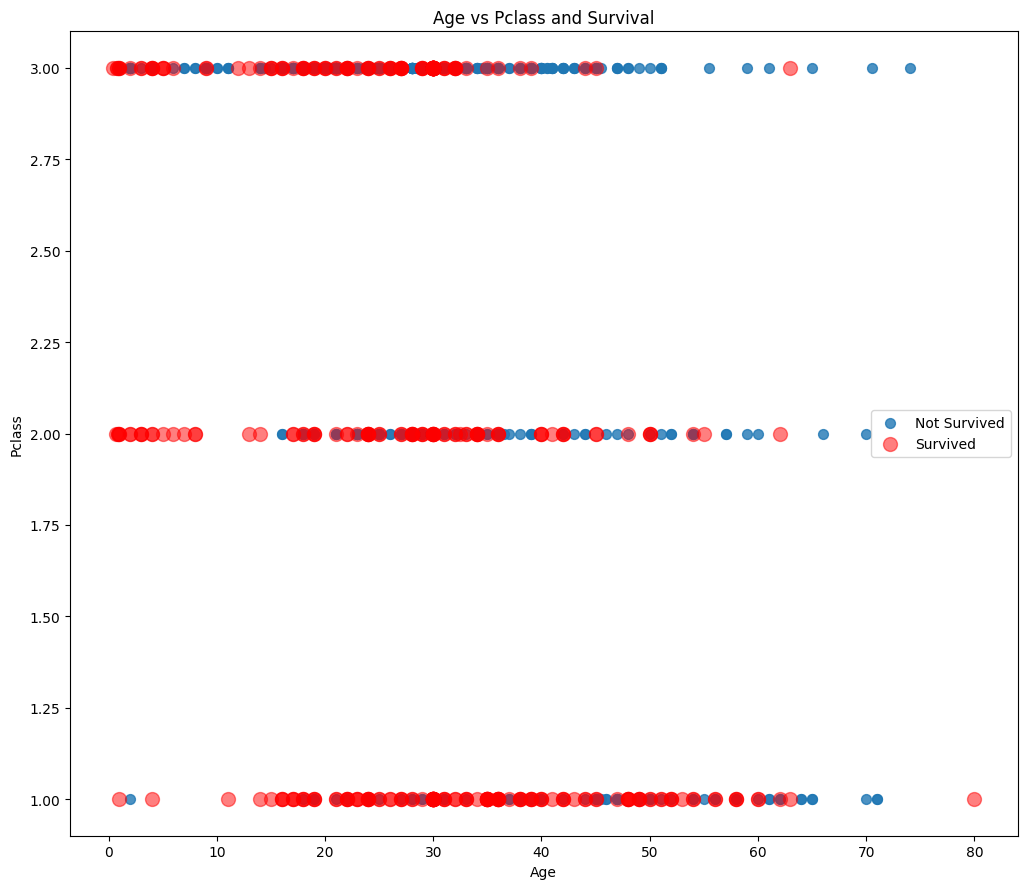

In [30]:
plt.figure(figsize=(20, 9))

plt.subplot(1, 2, 2)
scatter_plot(x='Age', y='Pclass', hue='Survived', label1='Not Survived', label2='Survived')

plt.title('Age vs Pclass and Survival')
plt.xlabel('Age')
plt.ylabel('Pclass')
plt.tight_layout()
plt.show()